In [1]:
import shapely
import json

In [2]:
with open('dsm2-flowlines-width.geojson','r') as f: dsm2_grid=json.load(f)

In [3]:
ch1=dsm2_grid['features'][0]

In [4]:
from shapely.geometry import mapping, shape

In [5]:
s = shape(ch1['geometry'])

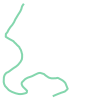

In [6]:
s

In [7]:
float(ch1['properties']['width'])

504.45456

In [8]:
#bounds=None
#    if bounds:
#        bounds.union(l.envelope)
#    else:
#        bounds=l.envelope
for f in dsm2_grid['features']:
    l=shape(f['geometry'])
    w=f['properties']['width']
    p=l.buffer(0.0000025*float(w))
    f['geometry']=mapping(p)     

In [24]:
from ipyleaflet import Map, GeoJSON, FullScreenControl
m = Map(center=(38,-121.5), zoom=9)
geo_json = GeoJSON(data=dsm2_grid,
                   style = {'color': 'green', 'opacity':1, 'weight':1.9, 'fillOpacity':0.5, 'fillColor':'blue'})
m.add_layer(geo_json)
m.add_control(FullScreenControl())
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [25]:
with open('dsm2-flowpolygons.geojson','w') as f: json.dump(dsm2_grid, f)

In [26]:
with open('dsm2-flowpolygons.geojson','r') as f: dsm2_poly_grid=json.load(f)

In [28]:
from ipyleaflet import Map, GeoJSON, FullScreenControl
m = Map(center=(38,-121.5), zoom=9)
geo_json = GeoJSON(data=dsm2_poly_grid,
                   style = {'color': 'blue', 'opacity':1, 'weight':1.9, 'fillOpacity':1, 'fillColor':'blue'})
m.add_layer(geo_json)
m.add_control(FullScreenControl())
display(m)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …